In [1]:
import tensorflow.keras as keras

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

Using TensorFlow backend.


In [2]:
from sklearn.metrics import confusion_matrix
import itertools

In [3]:
import tensorflow as tf

print(tf.__version__)

1.13.1


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

samples= 5
tipo = 3    # np.random.randint(4)
index_image = np.random.randint(100000)  


# ========== EXTRACCIÓN DE DATOS ==============
archivo = open('/home/endredra/Desktop/Int_proj/EL4106-1oProyecto/dataset/HiTS2013_100k_samples(4_channels)_images_labels.pkl',"rb")
example_dict= pickle.load(archivo)
print(example_dict['labels'].shape)
print(example_dict['images'].shape)

(100000,)
(100000, 21, 21, 4)


In [5]:
xx = example_dict['images'][:, :, :, tipo]
yy= example_dict['labels']
print(xx[:75000].shape)
print(xx[75000:].shape)
print(yy[:75000].shape[0])
print(yy[75000:].shape[0])
print(yy[:100])
#database to train
x_train=xx[:75000]
y_train=yy[:75000]

#database to test
x_test=xx[75000:]
y_test=yy[75000:]


input_shape1=x_test.shape[1]
input_shape2=x_test.shape[2]
print('\n\ninput_shape: ' , input_shape1, 'x', input_shape2)

input_shape = (input_shape1, input_shape2, 1)

(75000, 21, 21)
(25000, 21, 21)
75000
25000
[0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1
 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1
 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0]


input_shape:  21 x 21


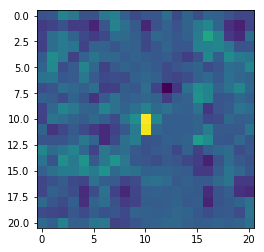

In [6]:
%matplotlib inline
plt.imshow(x_train[0])#,cmap=plt.cm.binary)
plt.show()

In [7]:
print('falso: ', y_train[0])

falso:  0


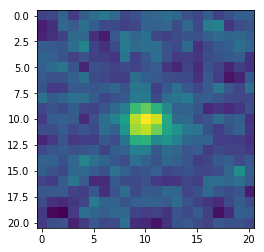

In [8]:
%matplotlib inline
plt.imshow(x_train[4])#,cmap=plt.cm.binary)
plt.show()

In [9]:
print('positivo: ', y_train[4])

positivo:  1


In [10]:
# Reshape the images.
r_x_train= np.expand_dims(x_train, axis=3)
r_x_test = np.expand_dims(x_test, axis=3)

In [11]:
############ modelo MLP #################

#model = tf.keras.models.Sequential()
 
#capas

#model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))


############ modelo Conv test #################


#model = Sequential()
#model.add(Conv2D(32, (3, 3), input_shape=input_shape))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))


#model.add(Flatten())
#model.add(Dense(32))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
#model.add(Dense(2))
#model.add(Activation('softmax'))


############ modelo Conv Keras #################


#model = Sequential([
#  Conv2D(num_filters, filter_size, input_shape=input_shape),
#  MaxPooling2D(pool_size=pool_size),
#  Flatten(),
#  Dense(10, activation='softmax'),
#])

##########################################################
##    21x21x1 -> 19x19x8 -> 10x10x8 -> FC=10 -> FC=2    ##
##########################################################

num_filters = 8  #profundidad
filter_size = 3  #3x3 filter (conv3)
pool_size = 2    # Max Pooling de 2

model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=input_shape),
  MaxPooling2D(pool_size=pool_size),
])


model.add(Flatten())
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

#compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
#entrenar
epocas=3

history = model.fit(r_x_train, y_train, validation_split=0.33, batch_size=10, epochs=epocas)



Instructions for updating:
Use tf.cast instead.
Train on 50249 samples, validate on 24751 samples
Epoch 1/3
50249/50249 [==============================] - 14s 277us/step - loss: 0.2446 - acc: 0.9074 - val_loss: 0.1463 - val_acc: 0.9457
Epoch 2/3
50249/50249 [==============================] - 13s 256us/step - loss: 0.1832 - acc: 0.9354 - val_loss: 0.1342 - val_acc: 0.9531
Epoch 3/3
50249/50249 [==============================] - 13s 266us/step - loss: 0.1726 - acc: 0.9383 - val_loss: 0.1317 - val_acc: 0.9534


In [13]:
val_loss, val_acc = model.evaluate(r_x_test, y_test)
print('\n\nLoss:', val_loss*100,'%\n\n')
print('Accuracy:', val_acc*100,'%\n\n')

25000/25000 [==============================] - 2s 68us/step


Loss: 13.299684811219572 %


Accuracy: 95.416 %




In [14]:
model.save('super_nova_class.model')

In [15]:
new_model = tf.keras.models.load_model('super_nova_class.model')

In [16]:
predictions_t = new_model.predict(r_x_test, batch_size=10)
print(predictions_t)

[[8.7802395e-02 9.1219759e-01]
 [9.4662793e-03 9.9053371e-01]
 [5.6898050e-02 9.4310194e-01]
 ...
 [9.9630827e-01 3.6917496e-03]
 [9.9998724e-01 1.2731949e-05]
 [9.9991977e-01 8.0202648e-05]]


In [17]:
for i in range(20):
    print('prediction: ',np.argmax(predictions_t[i]), ' -----  true class: ', y_test[i])
    

prediction:  1  -----  true class:  1
prediction:  1  -----  true class:  1
prediction:  1  -----  true class:  1
prediction:  1  -----  true class:  0
prediction:  1  -----  true class:  0
prediction:  1  -----  true class:  1
prediction:  1  -----  true class:  1
prediction:  1  -----  true class:  0
prediction:  0  -----  true class:  0
prediction:  0  -----  true class:  0
prediction:  1  -----  true class:  1
prediction:  1  -----  true class:  1
prediction:  0  -----  true class:  0
prediction:  1  -----  true class:  1
prediction:  0  -----  true class:  0
prediction:  1  -----  true class:  1
prediction:  0  -----  true class:  0
prediction:  1  -----  true class:  1
prediction:  0  -----  true class:  0
prediction:  0  -----  true class:  0


In [18]:
Samples=30

# Predict on the first 5 test images.
predictions = model.predict(r_x_test[:Samples], batch_size=10)


#r=range(Samples)
#l = [*r]
#print (l[:Samples])

# Print our model's predictions.
print('predict ', np.argmax(predictions, axis=1)) 

# Check our predictions against the ground truths.
print('class:  ', y_test[:Samples])



predict  [1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0]
class:   [1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0]


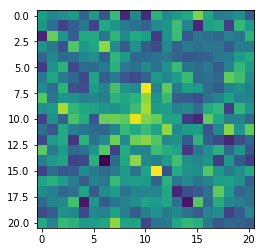

 imagem: 3 ----- tipo: 3 ----- class: 0 ----- prediction: 1 


In [19]:
%matplotlib inline
index_img=3
plt.figure("imagem: {} , tipo: {} , class: {}".format(index_img, tipo, y_test[index_img]))
plt.imshow(x_test[0])#,cmap=plt.cm.binary)


plt.show()
print(" imagem: {} ----- tipo: {} ----- class: {} ----- prediction: {} ".format(index_img, tipo, y_test[index_img], np.argmax(predictions[index_img])))


In [20]:
imagene_index=3


test_predict = model.predict(r_x_test[imagene_index:imagene_index+1], batch_size=10)
print('prediction test: ', test_predict)
print('prediction class test: ', np.argmax(test_predict), 'percentage: ', "%.2f" % (test_predict[0][np.argmax(test_predict)]*100), '%')

if(np.argmax(test_predict)==y_test[imagene_index]):
    print('acertou!')
else:
    print('errou!')


prediction test:  [[0.16392882 0.8360712 ]]
prediction class test:  1 percentage:  83.61 %
errou!


In [21]:
r_x_train[0].shape

(21, 21, 1)

In [22]:
x_train[0].shape

(21, 21)

In [23]:
imagene_index_t=0
typ_im=1


xx_test = example_dict['images'][:, :, :, typ_im]

r_xx_test= np.expand_dims(xx_test, axis=3)

test_predict_t = model.predict(r_xx_test[imagene_index_t:imagene_index_t+1])
print('prediction test: ', test_predict_t)
print('\n\n\nprediction class test: ', np.argmax(test_predict_t), 'percentage: ', "%.2f" % (test_predict_t[0][np.argmax(test_predict_t)]*100), '%')
print()
if(np.argmax(test_predict)==y_test[imagene_index_t]):
    print('acertou!')
else:
    print('errou!')


prediction test:  [[0.958928   0.04107204]]



prediction class test:  0 percentage:  95.89 %

acertou!


In [24]:
print('list: ',history.history.keys())
print('loss: ',history.history['val_loss'])

list:  dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
loss:  [0.14634571540443103, 0.13416573130947143, 0.13169082136980628]


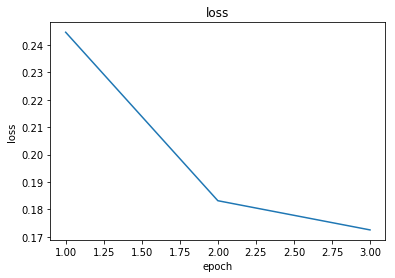

In [25]:
parametro='loss'

x_axis = np.arange(1,4,1)
y_axis = history.history[parametro]

plt.plot(x_axis,y_axis)
plt.xlabel('epoch')
plt.ylabel(parametro)
plt.title(parametro)
plt.show()

In [26]:
unos_train=0
ceros_train=0
unos_test=0
ceros_test=0

for val_train in y_train:

    if val_train==1:
        unos_train+=1
    else:
        ceros_train+=1


for val_test in y_test:

    if val_test==1:
        unos_test+=1
    else:
        ceros_test+=1    
        
print('unos_train: ', unos_train)
print('ceros_train: ', ceros_train)
print('percentage: %.2f' % (100*(unos_train/(unos_train+ceros_train))), '%')
print('\n\n\n')
print('unos_test: ', unos_test)
print('ceros_test: ', ceros_test)
print('percentage: %.2f' % (100*(unos_test/(unos_test+ceros_test))),'%')

unos_train:  37509
ceros_train:  37491
percentage: 50.01 %




unos_test:  12491
ceros_test:  12509
percentage: 49.96 %


In [34]:
print('y_test: ', y_test.shape)
print('np.argmax(predictions, axis=1)', np.argmax(predictions_t, axis=1).shape)
test_labels=y_test
rounded_predictions= model.predict_classes(r_x_test, batch_size=10)


cm= confusion_matrix(test_labels, rounded_predictions)

cm_2= np.zeros((2,2), dtype=int)
print(cm_2)
cm_2[0,0]=cm[1,1]
cm_2[1,1]=cm[0,0]
cm_2[1,0]=cm[0,1]
cm_2[0,1]=cm[1,0]
print(cm_2)

cm=cm_2


y_test:  (25000,)
np.argmax(predictions, axis=1) (25000,)
[[0 0]
 [0 0]]
[[12266   225]
 [  921 11588]]


In [35]:
def plot_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matix.
    Normalize can be applied by setting 'normalize=True'
    '''
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm= cm.astype('float') / cm.sum(axis-1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, without normalization')
        
        
    print(cm)

    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j], 
                 horizontalalignment = 'center', 
                 color = 'white' if cm[i,j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[12266   225]
 [  921 11588]]


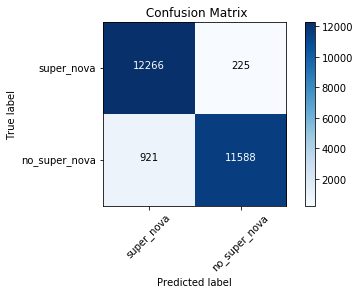

In [36]:
cm_plot_labels = ['super_nova','no_super_nova']
plot_confusion_matrix(cm,cm_plot_labels, title = ' Confusion Matrix')

